In [ ]:
# Copyright (c) Meta Platforms, Inc. and affiliates.

## 1. Imports and Model Loading

In [1]:
import os
import imageio
import uuid
from IPython.display import Image as ImageDisplay
from inference import Inference, ready_gaussian_for_video_rendering, render_video, load_image, load_single_mask, display_image, make_scene, interactive_visualizer

import torch
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from transformers import pipeline
from io import BytesIO

def show_masks(image, masks):
    """
    Helper function to display the image with masks overlaid.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    # Iterate through each mask and overlay it
    for mask in masks:
        # Convert PIL mask to numpy array (boolean)
        m = np.array(mask) > 0 
        
        # Generate a random color for this mask
        color = np.concatenate([np.random.random(3), [0.6]]) # [R, G, B, Alpha]
        
        # Create a colored mask image
        h, w = m.shape
        mask_image = m.reshape(h, w, 1) * color.reshape(1, 1, -1)
        
        # Overlay the mask
        ax.imshow(mask_image)

    plt.axis('off')
    plt.show()

/shared/ssd_28T/home/yl535/anaconda3/envs/sam3d-objects/lib/python3.11/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
Warp CUDA error 2: out of memory (in function wp_cuda_device_get_memory_info, /builds/omniverse/warp/warp/native/warp.cu:2231)
Warp CUDA error 201: invalid device context (in function wp_cuda_device_get_memory_info, /builds/omniverse/warp/warp/native/warp.cu:2234)
Warp CUDA error 201: invalid device context (in function wp_cuda_device_get_memory_info, /builds/omniverse/warp/warp/native/warp.cu:2236)
Warp CUDA error 2: out of memory (in function wp_cuda_device_get_memory_info, /builds/omniverse/warp/warp/native/warp.cu:2231)
Warp CUDA error 201: invalid device context (in function wp_cuda_device_get_memory_info, /builds/omniverse/w

Warp 1.10.0 initialized:
   CUDA Toolkit 12.8, Driver 12.2
   Devices:
     "cpu"      : "x86_64"
     "cuda:0"   : "NVIDIA H100 80GB HBM3" (79 GiB, sm_90, mempool enabled)
     "cuda:1"   : "NVIDIA H100 80GB HBM3" (0 GiB, sm_90, mempool enabled)
     "cuda:2"   : "NVIDIA H100 80GB HBM3" (0 GiB, sm_90, mempool enabled)
     "cuda:3"   : "NVIDIA H100 80GB HBM3" (79 GiB, sm_90, mempool enabled)
     "cuda:4"   : "NVIDIA H100 80GB HBM3" (79 GiB, sm_90, mempool enabled)
     "cuda:5"   : "NVIDIA H100 80GB HBM3" (79 GiB, sm_90, mempool enabled)
     "cuda:6"   : "NVIDIA H100 80GB HBM3" (79 GiB, sm_90, mempool enabled)
     "cuda:7"   : "NVIDIA H100 80GB HBM3" (79 GiB, sm_90, mempool enabled)
   CUDA peer access:
     Supported fully (all-directional)
   Kernel cache:
     /PHShome/yl535/.cache/warp/1.10.0


2025-11-24 12:31:25.064 | INFO     | sam3d_objects.pipeline.inference_pipeline:set_attention_backend:15 - GPU name is NVIDIA H100 80GB HBM3


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


2025-11-24 12:31:27.067 | INFO     | sam3d_objects.model.backbone.tdfy_dit.modules.sparse:__from_env:39 - [SPARSE] Backend: spconv, Attention: flash_attn
2025-11-24 12:31:30.851 | INFO     | sam3d_objects.model.backbone.tdfy_dit.modules.attention:__from_env:30 - [ATTENTION] Using backend: flash_attn


[SPARSE][CONV] spconv algo: auto


2025-11-24 12:31:31.084 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 
2025-11-24 12:31:31.085 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 


In [2]:
PATH = os.getcwd()
TAG = "hf"
config_path = f"{PATH}/../checkpoints/{TAG}/pipeline.yaml"
config_path = f"{PATH}/../checkpoints/checkpoints/pipeline.yaml"
inference = Inference(config_path, compile=False)

device = 0 if torch.cuda.is_available() else -1
generator = pipeline(
    "mask-generation", 
    model="facebook/sam2-hiera-large", 
    device=device,
    torch_dtype=torch.float32 
)

2025-11-24 12:31:31.546 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 


/shared/ssd_28T/home/yl535/anaconda3/envs/sam3d-objects/lib/python3.11/site-packages/moge/model/v1.py:171: UserWarning: The following deprecated/invalid arguments are ignored: {'output_mask': True, 'split_head': True}
  warnings.warn(f"The following deprecated/invalid arguments are ignored: {deprecated_kwargs}")
2025-11-24 12:31:42.668 | WARNING  | sam3d_objects.data.dataset.tdfy.preprocessor:__post_init__:51 - No rgb pointmap normalizer provided, using scale + shift 
2025-11-24 12:31:42.671 | INFO     | sam3d_objects.pipeline.inference_pipeline:__init__:98 - self.device: cuda
2025-11-24 12:31:42.671 | INFO     | sam3d_objects.pipeline.inference_pipeline:__init__:99 - CUDA_VISIBLE_DEVICES: None
2025-11-24 12:31:42.671 | INFO     | sam3d_objects.pipeline.inference_pipeline:__init__:100 - Actually using GPU: 0
2025-11-24 12:31:42.672 | INFO     | sam3d_objects.pipeline.inference_pipeline:init_pose_decoder:295 - Using pose decoder: ScaleShiftInvariant
2025-11-24 12:31:42.672 | INFO     | 

In [ ]:
# url = "https://huggingface.co/datasets/hf-internal-testing/sam2-fixtures/resolve/main/truck.jpg"
# IMAGE_NAME = url.split('/')[-1].split('.')[0]
# image = Image.open(requests.get(url, stream=True).raw)

# IMAGE_PATH = f"{PATH}/images/Fundus_photograph_of_normal_left_eye.jpg"
IMAGE_PATH = f"{PATH}/images/r1_Im040.jpg"
IMAGE_NAME = IMAGE_PATH.split('/')[-1].split('.')[0]
image = Image.open(IMAGE_PATH)

# response = requests.get(url)
# image_data = BytesIO(response.content)
# image = Image.open(image_data).convert("RGB") # Good practice to ensure RGB

# IMAGE_PATH = f"{PATH}/images/truck.jpg"
# IMAGE_NAME = os.path.basename(os.path.dirname(IMAGE_PATH))
# image = load_image(IMAGE_PATH)

# 3. Generate masks
# 'points_per_batch' manages memory usage. Reduce it (e.g., to 32) if you run out of VRAM.
outputs = generator(image, points_per_batch=64)

# The pipeline returns a dict: {'masks': [PIL.Image], 'scores': [...]}
# masks = outputs["masks"]
masks = [x.detach().numpy() for x in outputs["masks"]] 

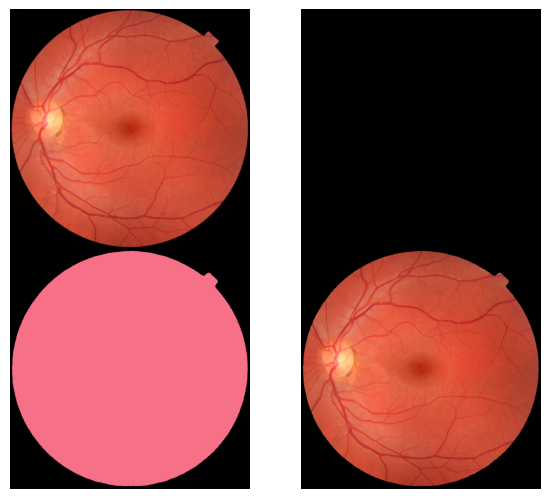

In [6]:
mask_index=0
image_np = np.array(image)
display_image(image_np, masks=[masks[mask_index]])

In [7]:
output = inference(image_np, masks[mask_index], seed=42)

# export gaussian splat (as point cloud)
output["gs"].save_ply(f"{PATH}/gaussians/single/{IMAGE_NAME}.ply")

2025-11-22 16:25:08.592 | INFO     | sam3d_objects.pipeline.inference_pipeline:sample_sparse_structure:662 - Sampling sparse structure: inference_steps=25, strength=7, interval=[0, 500], rescale_t=3, cfg_strength_pm=0.0
2025-11-22 16:25:08.593 | INFO     | sam3d_objects.pipeline.inference_pipeline:get_condition_input:631 - Running condition embedder ...
2025-11-22 16:25:08.684 | INFO     | sam3d_objects.pipeline.inference_pipeline:get_condition_input:635 - Condition embedder finishes!
2025-11-22 16:25:13.212 | INFO     | sam3d_objects.pipeline.inference_pipeline:sample_sparse_structure:712 - Downsampled coords from 9550 to 9550
2025-11-22 16:25:13.268 | INFO     | sam3d_objects.pipeline.inference_pipeline_pointmap:run:368 - Rescaling scale by 1 after downsampling
2025-11-22 16:25:13.269 | INFO     | sam3d_objects.pipeline.inference_pipeline:sample_slat:742 - Sampling sparse latent: inference_steps=25, strength=1, interval=[0, 500], rescale_t=1
2025-11-22 16:25:13.269 | INFO     | sam3d

In [8]:
# render gaussian splat
scene_gs = make_scene(output)
scene_gs = ready_gaussian_for_video_rendering(scene_gs)

video = render_video(
    scene_gs,
    r=1,
    fov=60,
    pitch_deg=15,
    yaw_start_deg=-45,
    resolution=512,
)["color"]

# save video as gif
imageio.mimsave(
    os.path.join(f"{PATH}/gaussians/single/{IMAGE_NAME}.gif"),
    video,
    format="GIF",
    duration=1000 / 30,  # default assuming 30fps from the input MP4
    loop=0,  # 0 means loop indefinitely
)

# notebook display
ImageDisplay(url=f"gaussians/single/{IMAGE_NAME}.gif?cache_invalidator={uuid.uuid4()}")

Rendering: 300it [00:05, 56.45it/s] 


In [ ]:
IMAGE_PATH = f"{PATH}/images/shutterstock_stylish_kidsroom_1640806567/image.png"
IMAGE_NAME = os.path.basename(os.path.dirname(IMAGE_PATH))

image = load_image(IMAGE_PATH)
# run model
output = inference(image, mask, seed=42)

# export gaussian splat (as point cloud)
output["gs"].save_ply(f"{PATH}/gaussians/single/{IMAGE_NAME}.ply")

## 2. Load input image to lift to 3D (single object)

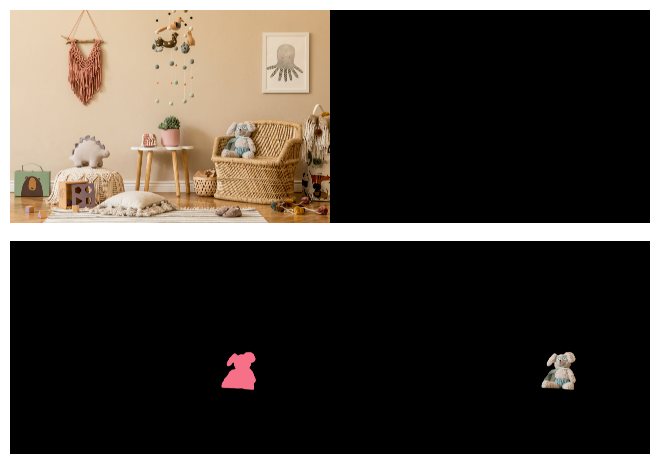

In [16]:
IMAGE_PATH = f"{PATH}/images/shutterstock_stylish_kidsroom_1640806567/image.png"
IMAGE_NAME = os.path.basename(os.path.dirname(IMAGE_PATH))

image = load_image(IMAGE_PATH)
mask = load_single_mask(os.path.dirname(IMAGE_PATH), index=14)
display_image(image, masks=[mask])

## 3. Generate Gaussian Splat

In [5]:
# run model
output = inference(image, mask, seed=42)

# export gaussian splat (as point cloud)
output["gs"].save_ply(f"{PATH}/gaussians/single/{IMAGE_NAME}.ply")

2025-11-21 11:07:44.008 | INFO     | sam3d_objects.pipeline.inference_pipeline:sample_sparse_structure:662 - Sampling sparse structure: inference_steps=25, strength=7, interval=[0, 500], rescale_t=3, cfg_strength_pm=0.0
2025-11-21 11:07:44.014 | INFO     | sam3d_objects.pipeline.inference_pipeline:get_condition_input:631 - Running condition embedder ...
2025-11-21 11:07:44.341 | INFO     | sam3d_objects.pipeline.inference_pipeline:get_condition_input:635 - Condition embedder finishes!
2025-11-21 11:07:48.318 | INFO     | sam3d_objects.pipeline.inference_pipeline:sample_sparse_structure:712 - Downsampled coords from 26904 to 26344
2025-11-21 11:07:48.361 | INFO     | sam3d_objects.pipeline.inference_pipeline_pointmap:run:368 - Rescaling scale by 1 after downsampling
2025-11-21 11:07:48.362 | INFO     | sam3d_objects.pipeline.inference_pipeline:sample_slat:742 - Sampling sparse latent: inference_steps=25, strength=1, interval=[0, 500], rescale_t=1
2025-11-21 11:07:48.363 | INFO     | sam

## 4. Visualize Gaussian Splat
### a. Animated Gif

In [6]:
# render gaussian splat
scene_gs = make_scene(output)
scene_gs = ready_gaussian_for_video_rendering(scene_gs)

video = render_video(
    scene_gs,
    r=1,
    fov=60,
    pitch_deg=15,
    yaw_start_deg=-45,
    resolution=512,
)["color"]

# save video as gif
imageio.mimsave(
    os.path.join(f"{PATH}/gaussians/single/{IMAGE_NAME}.gif"),
    video,
    format="GIF",
    duration=1000 / 30,  # default assuming 30fps from the input MP4
    loop=0,  # 0 means loop indefinitely
)

# notebook display
ImageDisplay(url=f"gaussians/single/{IMAGE_NAME}.gif?cache_invalidator={uuid.uuid4()}")

Rendering: 300it [00:02, 132.13it/s]


### b. Interactive Visualizer

In [ ]:
# might take a while to load (black screen)
interactive_visualizer(f"{PATH}/gaussians/single/{IMAGE_NAME}.ply")